## Assignment 1B Programming exercise
1. Basic implementation of linear regression (using first principles) - 15 points
2. Exploring the effect of different learning rates on convergence - 10 points
3. Implementation of feature scaling, feature standardization and regularization for improved learning - 10 points
4. Data visualization to understand the working of algorithm and other steps (applicable toall the above stages) - 15 points

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (12, 6)
import seaborn as sns
sns.set_style('whitegrid') 

In [2]:
# dataset
df = pd.read_csv("insurance.csv")

## Data Description
- `age:` age of primary beneficiary
- `sex:` insurance contractor gender, female, male
- `bmi:` Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- `children:` Number of children covered by health insurance / Number of dependents
- `smoker:` Smoking
- `region:` the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- `charges:` Individual medical costs billed by health insurance

[Medical Insurance Cost dataset on Kaggle](https://www.kaggle.com/mirichoi0218/insurance)

In [3]:
# View dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# View first five observations
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Exploration & Pre-processing 

In [5]:
# Categorical variable description
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [6]:
# Numerical variable description
df.describe(include=np.number)

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# Count of categorical columns 
for col in df.columns:
    if df[col].dtype == 'object':
        print('\nColumn Name:', col,)
        print(df[col].value_counts())


Column Name: sex
male      676
female    662
Name: sex, dtype: int64

Column Name: smoker
no     1064
yes     274
Name: smoker, dtype: int64

Column Name: region
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [8]:
# Encode categorical features
# Dummy encoding because the categorical features are nominal
category_df = df.select_dtypes('object')
dummy_df = pd.get_dummies(category_df, drop_first=True)

In [9]:
# Select the numerical features 
numeric_df = df.select_dtypes(include=[np.number])

In [10]:
# Encoded dataset
df_encoded = pd.concat([dummy_df, numeric_df], axis=1)

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
df_encoded.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
0,0,1,0,0,1,19,27.900,0,16884.92400
1,1,0,0,1,0,18,33.770,1,1725.55230
2,1,0,0,1,0,28,33.000,3,4449.46200
3,1,0,1,0,0,33,22.705,0,21984.47061
4,1,0,1,0,0,32,28.880,0,3866.85520


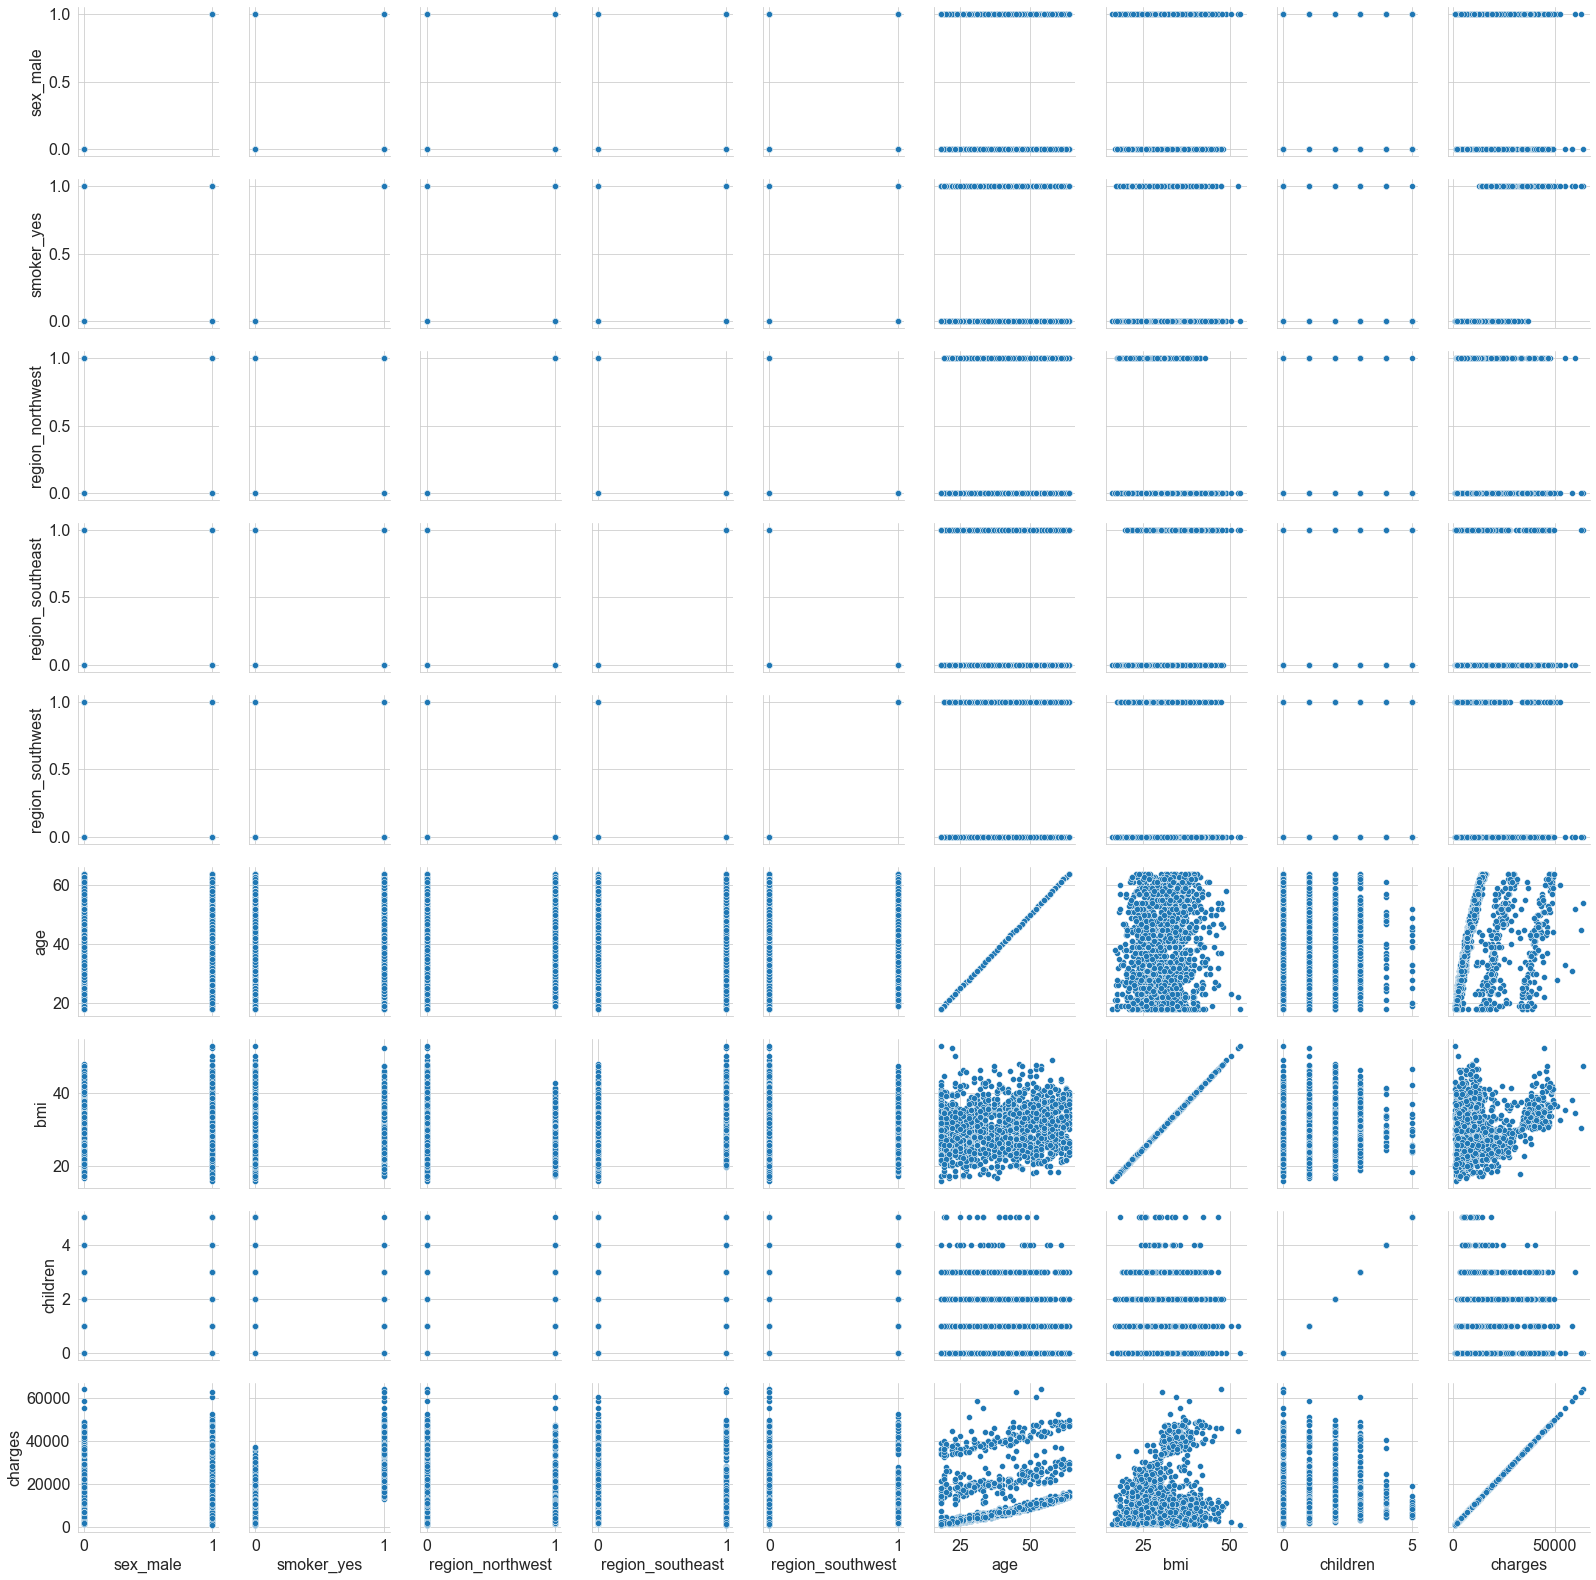

In [13]:
# Visualise relationships 
df_encoded_scatter_plot = sns.PairGrid(df_encoded)
df_encoded_scatter_plot.map(sns.scatterplot);

# Basic implementation of linear regression (using first principles)

In [14]:
# Filtering the input features
input_features = df_encoded.loc[:, ~df_encoded.columns.isin(['charges'])]

In [15]:
# Bias (theta_0) term introduction to input features
X = np.concatenate((np.ones((len(input_features),1)),input_features),axis=1)

In [16]:
# Design Matrix 
X

array([[ 1.  ,  0.  ,  1.  , ..., 19.  , 27.9 ,  0.  ],
       [ 1.  ,  1.  ,  0.  , ..., 18.  , 33.77,  1.  ],
       [ 1.  ,  1.  ,  0.  , ..., 28.  , 33.  ,  3.  ],
       ...,
       [ 1.  ,  0.  ,  0.  , ..., 18.  , 36.85,  0.  ],
       [ 1.  ,  0.  ,  0.  , ..., 21.  , 25.8 ,  0.  ],
       [ 1.  ,  0.  ,  1.  , ..., 61.  , 29.07,  0.  ]])

In [17]:
X.shape

(1338, 9)

In [18]:
y = df_encoded['charges'].values.reshape(-1,1)

### Gradient Descent for Linear Regression

$$
Initialize \hspace{0.3cm} \theta
$$

$$
\theta = 2 \hspace{0.1cm} for \hspace{0.1cm} all \hspace{0.1cm} 1338 {\times} 1 \hspace{0.1cm} matrix \hspace{0.1cm} entries
$$

In [19]:
# Initial estimate of parameters
theta = np.zeros((X.shape[1],1))+2

In [20]:
# Initial theta
theta

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.]])

In [21]:
# Predict insurance charges using initial parameter estimate
y_pred = X.dot(theta)

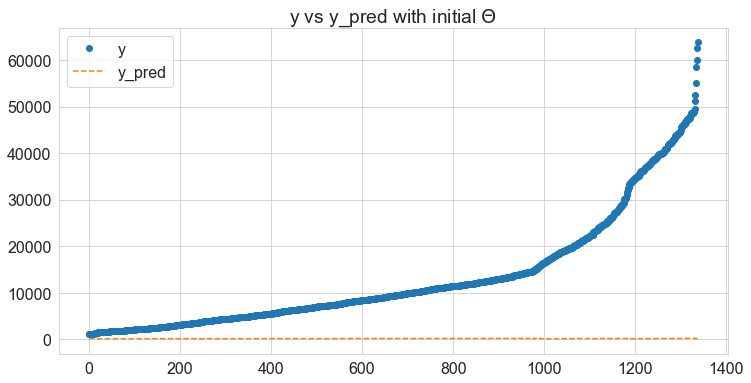

In [23]:
# Visualize the y vs y_pred with initial theta vector
sortidx = np.argsort(y[:,0])
plt.plot(y[sortidx,0],'o', label = "y")
plt.plot(y_pred[sortidx,0],'--', label = "y_pred")
plt.title("y vs y_pred with initial $ \Theta $")
plt.legend()
plt.show();

##### Cost function
$$ J(\theta) = \frac{1}{2n} \sum_{i=1}^{n} (h_{\theta}(x^{(i)}) - y^{(i)})^2 $$

In [24]:
n = len(X)

In [25]:
def cost_function(theta):
    J = np.sum((X.dot(theta)-y)**2,axis=0)[0]
    return J

In [26]:
cost_function(theta)

426138302511.1221

#### Cost funtion derivative with respect to theta

$$ \frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{n} \sum_{i=1}^{n} (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)}$$

In [27]:
def cost_function_derivative_wr(theta):
    dJ = 1/n*np.sum((X.dot(theta)-y)*X,axis=0).reshape(-1,1)
    return dJ

In [28]:
cost_function_derivative_wr(theta)

array([[ -13123.55586006],
       [  -6976.64924226],
       [  -6533.17734816],
       [  -2981.14359981],
       [  -3967.32332084],
       [  -2963.18150046],
       [-564958.31772742],
       [-416954.9178459 ],
       [ -15356.56611352]])

#### Gradient descent implementation
- Initialize $$\theta$$
- Repeat until convergence:
    $$ \theta_j \leftarrow \theta_j - \alpha \frac{1}{n} \sum_{i=1}^{n} (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)} $$
- Simultaneous update for $$ j = 0...d $$
- Where simultaneous update is achieved when:
    - At the start of each gradient descent iteration, compute $$ h_{\theta}(x^{(i)}) $$
    - Use this stored value in the update step loop
- Assume convergence when $$ ||\theta_{new} - \theta_{old}||_2 < \epsilon $$


$\epsilon$ = 1e-7 which is 0.0000001

In [29]:
def gradient_descent(theta,learning_rate = 0.05,epochs=100000, E=1e-7):
    
    theta_history = [theta]
    J_history = [cost_function(theta)]
    
    theta_new = theta*10000
    print(f'epoch \t Cost(J) \t')
    for epoch in range(epochs):
        if epoch%10000 == 0:
            print(f'{epoch:5d}\t{J_history[-1]:7.4f}\t')
        dJ = cost_function_derivative_wr(theta)
        J = cost_function(theta)
        
        theta_new = theta - learning_rate*dJ
        theta_history.append(theta_new)
        J_history.append(J)
        
        if np.sum((theta_new - theta)**2) < E:
            print('Convergence achieved.')
            break
        theta = theta_new

    return theta_new,theta_history,J_history

In [30]:
# Initial estimate of parameters
initial_theta = np.zeros((X.shape[1],1))+2

In [31]:
theta,theta_history,J_history = gradient_descent(initial_theta)

epoch 	 Cost(J) 	
    0	426138302511.1221	


C:\Users\ELINIM~1\AppData\Local\Temp/ipykernel_23300/2482359870.py:2: RuntimeWarning: overflow encountered in square
  J = np.sum((X.dot(theta)-y)**2,axis=0)[0]
C:\Users\ELINIM~1\AppData\Local\Temp/ipykernel_23300/576349567.py:18: RuntimeWarning: overflow encountered in square
  if np.sum((theta_new - theta)**2) < E:
C:\Users\Eli Nimy\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\ELINIM~1\AppData\Local\Temp/ipykernel_23300/1530664189.py:2: RuntimeWarning: invalid value encountered in multiply
  dJ = 1/n*np.sum((X.dot(theta)-y)*X,axis=0).reshape(-1,1)
C:\Users\ELINIM~1\AppData\Local\Temp/ipykernel_23300/576349567.py:14: RuntimeWarning: invalid value encountered in subtract
  theta_new = theta - learning_rate*dJ


10000	    nan	
20000	    nan	
30000	    nan	
40000	    nan	
50000	    nan	
60000	    nan	
70000	    nan	
80000	    nan	
90000	    nan	


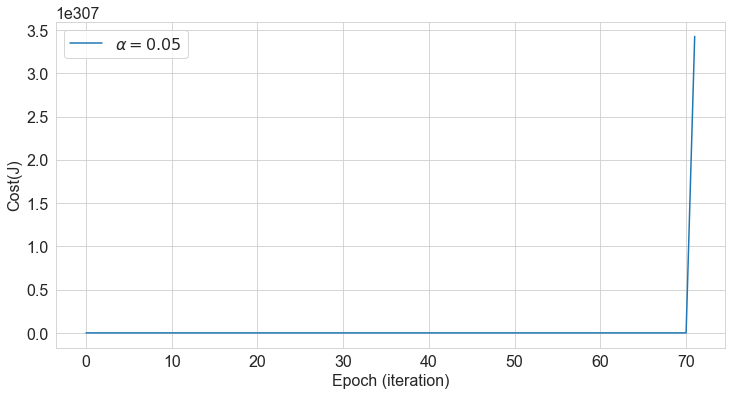

In [32]:
plt.plot(J_history, label = r"$\alpha = 0.05$");
plt.xlabel("Epoch (iteration)")
plt.ylabel("Cost(J)")
plt.legend()
plt.show();

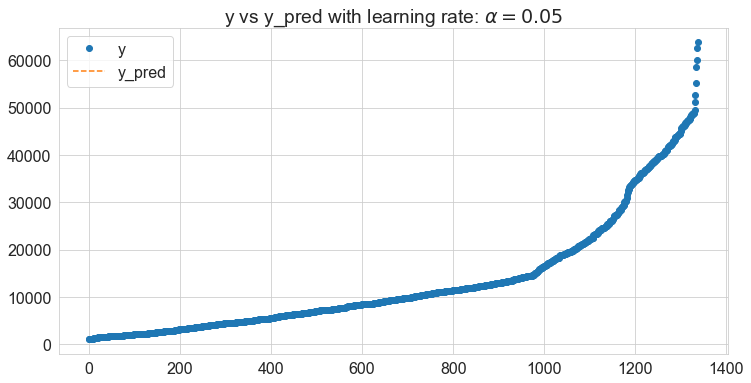

In [33]:
y_pred = X.dot(theta)
sortidx = np.argsort(y[:,0])
plt.plot(y[sortidx,0],'o', label = "y")
plt.plot(y_pred[sortidx,0],'--', label = "y_pred")
plt.title(r"y vs y_pred with learning rate: $ \alpha = 0.05$")
plt.legend()
plt.show();

##  Exploring the effect of different learning rates on convergence

In [34]:
theta,theta_history,J_history = gradient_descent(initial_theta,learning_rate=0.0005)

epoch 	 Cost(J) 	
    0	426138302511.1221	
10000	76928120801.0994	
20000	57142847121.0468	
30000	52499297780.5726	
40000	51055262706.7968	
50000	50392850518.6832	
60000	49985779569.7404	
70000	49700212201.2550	
80000	49490131891.4101	
90000	49332893821.6390	


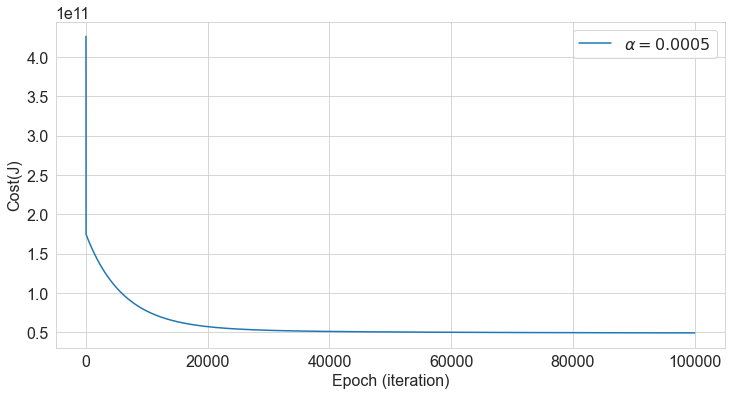

In [35]:
plt.plot(J_history, label = r"$\alpha = 0.0005$");
plt.xlabel("Epoch (iteration)")
plt.ylabel("Cost(J)")
plt.legend()
plt.show();

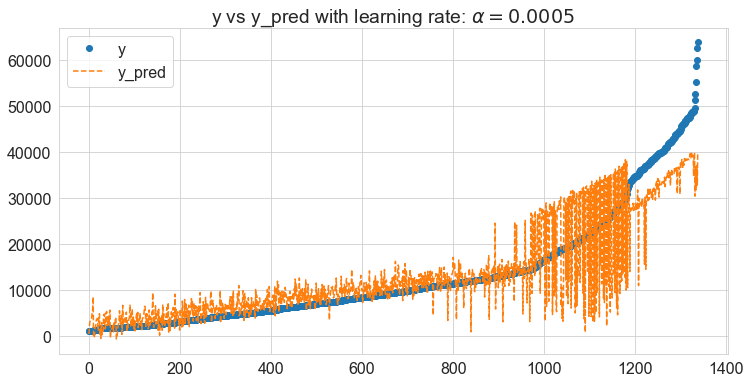

In [36]:
y_pred = X.dot(theta)
sortidx = np.argsort(y[:,0])
plt.plot(y[sortidx,0],'o', label = "y")
plt.plot(y_pred[sortidx,0],'--', label = "y_pred")
plt.title(r"y vs y_pred with learning rate: $ \alpha = 0.0005$")
plt.legend()
plt.show();

In [37]:
theta,theta_history,J_history = gradient_descent(initial_theta,learning_rate=0.000005)

epoch 	 Cost(J) 	
    0	426138302511.1221	
10000	172788959577.8648	
20000	170801399594.9069	
30000	168851828842.3841	
40000	166938932343.7887	
50000	165061512033.1697	
60000	163218468200.1778	
70000	161408787170.8882	
80000	159631530658.4419	
90000	157885826554.0355	


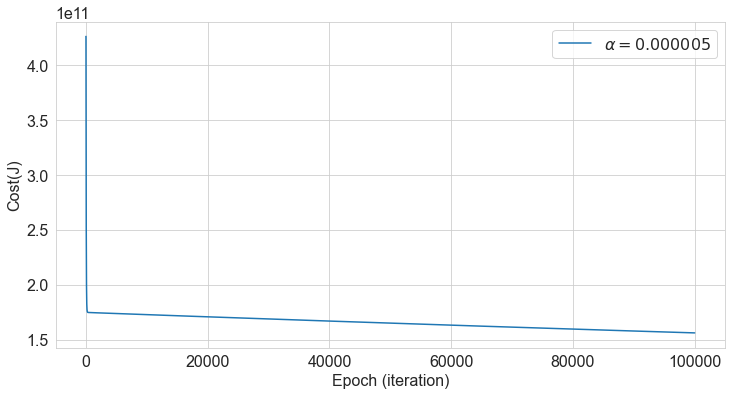

In [38]:
plt.plot(J_history, label = r"$\alpha = 0.000005$");
plt.xlabel("Epoch (iteration)")
plt.ylabel("Cost(J)")
plt.legend()
plt.show();

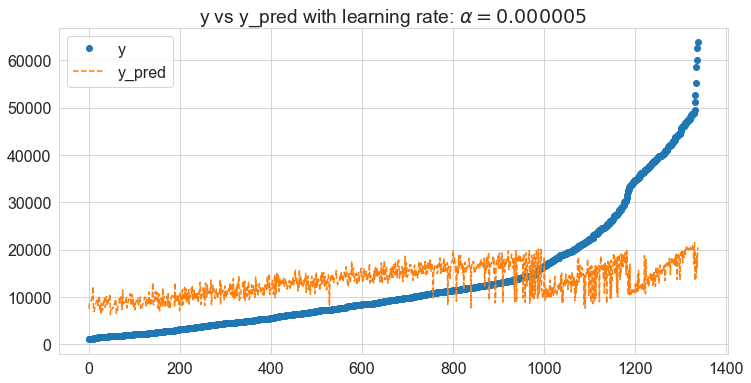

In [39]:
y_pred = X.dot(theta)
sortidx = np.argsort(y[:,0])
plt.plot(y[sortidx,0],'o', label = "y")
plt.plot(y_pred[sortidx,0],'--', label = "y_pred")
plt.title(r"y vs y_pred with learning rate: $ \alpha = 0.000005$")
plt.legend()
plt.show();

# Implementation of feature scaling, feature standardization and regularization for improved learning

## Feature Scaling

In [40]:
# Scaling numerical columns/Features only
X_scale = df_encoded[['age', 'bmi', 'children']]
X_cat = df_encoded.loc[:, ~df_encoded.columns.isin(['age', 'bmi','charges', 'children'])]

In [41]:
y = df_encoded['charges'].values.reshape(-1,1)

In [42]:
n = len(y)

#### `Normalization or Min-Max Scaling` is used to transform features to be on a similar scale

$$ X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}} $$

In [43]:
# Normalize features
def X_normalization(X):
    X_norm = X.copy()
    X_min = np.min(X)
    X_max = np.max(X)
    X_norm = (X-X_min)/(X_max-X_min)
    return X_norm

In [44]:
X_norm = X_normalization(X_scale)

In [45]:
X_scaled_df = pd.concat([X_cat, X_norm], axis=1)

In [46]:
# Normalize label feature
def y_normalization(y):
    y_norm = y.copy()
    y_min = np.min(y)
    y_max = np.max(y)
    y_norm = (y-y_min)/(y_max - y_min)
    return y_norm

In [47]:
y_norm = y_normalization(y)

In [48]:
y = y_norm

In [49]:
# Design Matrix
X = np.concatenate((np.ones((len(X_scaled_df),1)),X_scaled_df),axis=1)
X.shape

(1338, 9)

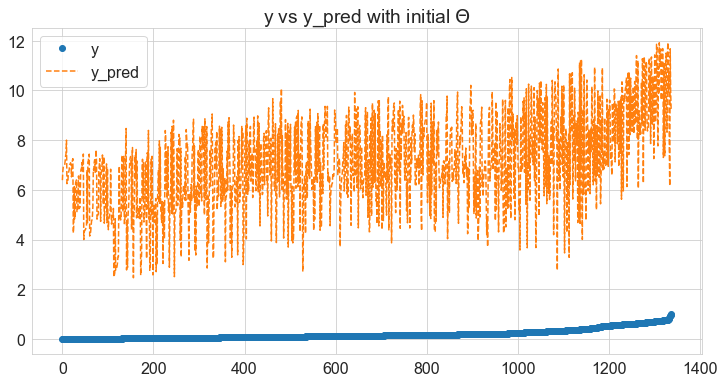

In [50]:
# Initial estimate of parameters
initial_theta = np.zeros((X.shape[1],1))+2

y_pred = X.dot(initial_theta)

sortidx = np.argsort(y[:,0]) # sort the values for better visualization
plt.plot(y[sortidx,0],'o', label = "y")
plt.plot(y_pred[sortidx,0],'--', label = "y_pred")
plt.title("y vs y_pred with initial $ \Theta $");
plt.legend()
plt.show();

In [51]:
def cost_function(theta):
    J = np.sum((X.dot(theta)-y)**2,axis=0)[0]
    return J
def cost_function_derivative_wr(theta):
    dJ = 1/n*np.sum((X.dot(theta)-y)*X,axis=0).reshape(-1,1)
    return dJ

def gradient_descent(theta,learning_rate = 0.05,epochs=100000, E=1e-7):
    
    theta_history = [theta]
    J_history = [cost_function(theta)]
    
    theta_new = theta*10000
    print(f'epoch \t Cost(J) \t')
    for epoch in range(epochs):
        if epoch%10000 == 0:
            print(f'{epoch:5d}\t{J_history[-1]:7.4f}\t')
        dJ = cost_function_derivative_wr(theta)
        J = cost_function(theta)
        
        theta_new = theta - learning_rate*dJ
        theta_history.append(theta_new)
        J_history.append(J)
        
        if np.sum((theta_new - theta)**2) < E:
            print('Convergence achieved.')
            break
        theta = theta_new

    return theta_new,theta_history,J_history

In [52]:
# Initial estimate of parameters
initial_theta = np.zeros((X.shape[1],1))+2

In [53]:
theta,theta_history,J_history = gradient_descent(initial_theta,learning_rate=0.05)

epoch 	 Cost(J) 	
    0	67661.6036	
Convergence achieved.


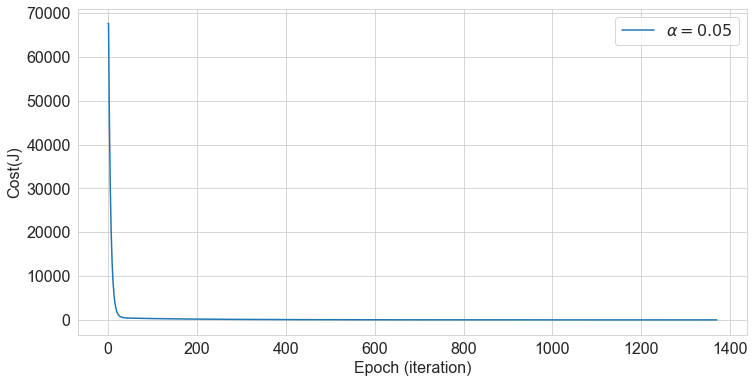

In [54]:
plt.plot(J_history, label = r"$\alpha = 0.05$");
plt.xlabel("Epoch (iteration)")
plt.ylabel("Cost(J)")
plt.legend()
plt.show();

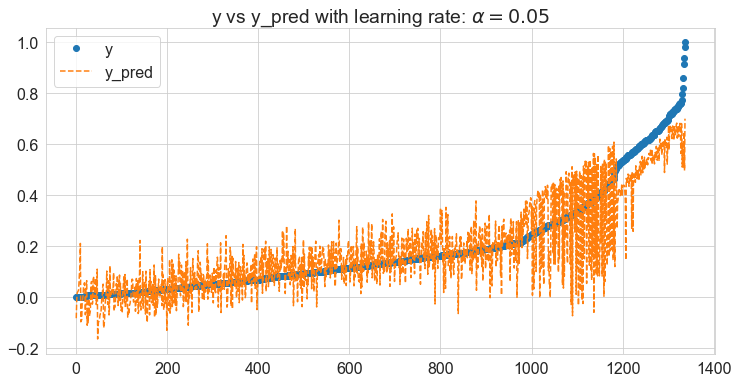

In [55]:
y_pred = X.dot(theta)
sortidx = np.argsort(y[:,0])
plt.plot(y[sortidx,0],'o', label = "y")
plt.plot(y_pred[sortidx,0],'--', label = "y_pred")
plt.title(r"y vs y_pred with learning rate: $ \alpha = 0.05$")
plt.legend()
plt.show();

## Feature Standardization

#### `Standardization or Z-Score Normalization` is the transformation of features by subtracting from mean and dividing by standard deviation. 

$$ x_{j}^{(i)} \leftarrow \frac{x_{j}^{(i)} - \mu_{j}}{s_j} $$

where $\mu_{j}$ and $s_j$ are the mean and standard deviation of feature $j$ 

In [56]:
def feature_standardization(f_input):
    f_input = f_input.copy()
    f_input = (f_input - np.mean(f_input))/(np.std(f_input))
    return f_input

In [57]:
y = df_encoded['charges'].values.reshape(-1,1)

In [58]:
X_stand = feature_standardization(X_scale)

In [59]:
X_stand_df = pd.concat([X_cat, X_stand], axis=1)

In [60]:
y_stand = feature_standardization(y)

In [61]:
y = y_stand

In [62]:
# Design Matrix
X = np.concatenate((np.ones((len(X_stand_df),1)),X_stand_df),axis=1)
X.shape

(1338, 9)

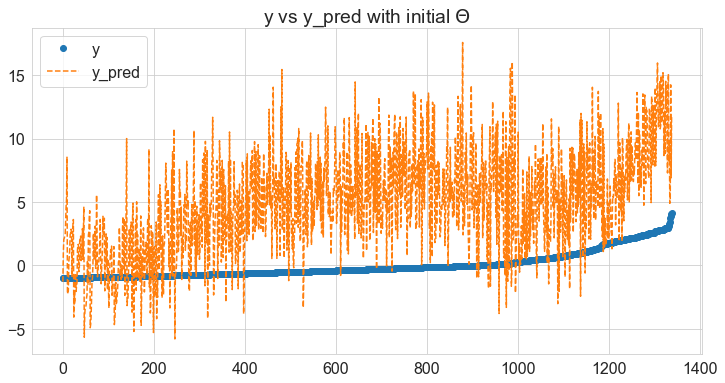

In [63]:
# Initial estimate of parameters
initial_theta = np.zeros((X.shape[1],1))+2

y_pred = X.dot(initial_theta)

sortidx = np.argsort(y[:,0]) # sort the values for better visualization
plt.plot(y[sortidx,0],'o', label = "y")
plt.plot(y_pred[sortidx,0],'--', label = "y_pred")
plt.title("y vs y_pred with initial $ \Theta $");
plt.legend()
plt.show();

In [64]:
def cost_function(theta):
    J = np.sum((X.dot(theta)-y)**2,axis=0)[0]
    return J

def cost_function_derivative_wr(theta):
    dJ = 1/n*np.sum((X.dot(theta)-y)*X,axis=0).reshape(-1,1)
    return dJ

def gradient_descent(theta,learning_rate = 0.05,epochs=100000, E=1e-7):
    
    theta_history = [theta]
    J_history = [cost_function(theta)]
    
    theta_new = theta*10000
    print(f'epoch \t Cost(J) \t')
    for epoch in range(epochs):
        if epoch%10000 == 0:
            print(f'{epoch:5d}\t{J_history[-1]:7.4f}\t')
        dJ = cost_function_derivative_wr(theta)
        J = cost_function(theta)
        
        theta_new = theta - learning_rate*dJ
        theta_history.append(theta_new)
        J_history.append(J)
        
        if np.sum((theta_new - theta)**2) < E:
            print('Convergence achieved.')
            break
        theta = theta_new

    return theta_new,theta_history,J_history

In [65]:
# Initial estimate of parameters
initial_theta = np.zeros((X.shape[1],1))+2

In [66]:
theta,theta_history,J_history = gradient_descent(initial_theta,learning_rate=0.05)

epoch 	 Cost(J) 	
    0	51138.4594	
Convergence achieved.


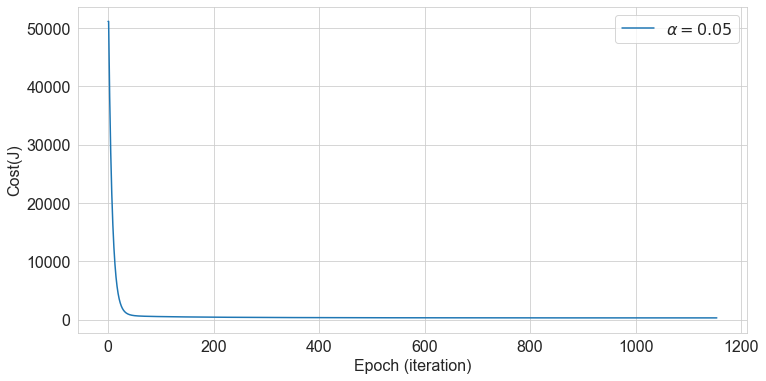

In [67]:
plt.plot(J_history, label = r"$\alpha = 0.05$");
plt.xlabel("Epoch (iteration)")
plt.ylabel("Cost(J)")
plt.legend()
plt.show();

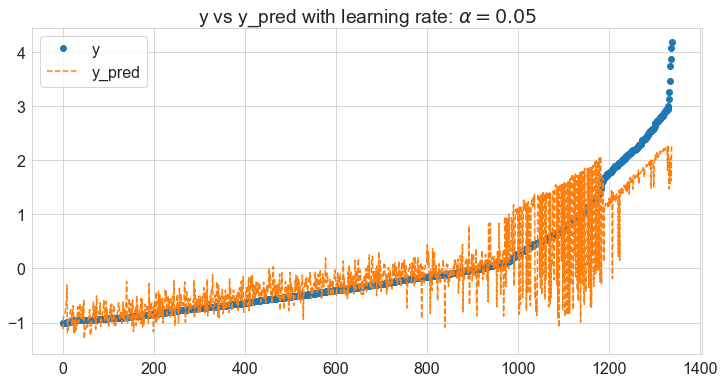

In [68]:
y_pred = X.dot(theta)
sortidx = np.argsort(y[:,0])
plt.plot(y[sortidx,0],'o', label = "y")
plt.plot(y_pred[sortidx,0],'--', label = "y_pred")
plt.title(r"y vs y_pred with learning rate: $ \alpha = 0.05$")
plt.legend()
plt.show();

## Regularization

#### Cost function
$$ J(\theta) = \frac{1}{2n} \sum_{i=1}^{n} (h_{\theta}(x^{(i)}) - y^{(i)})^2 + \lambda \sum_{j=1}^{d} \theta_{j}^{2}$$

In [69]:
def regularized_cost_function(theta, lambda_val):
    J = np.sum(((X.dot(theta)-y)**2) + lambda_val*np.sum(np.square(theta)), axis=0)[0]
    return J

#### Gradient update:
$$ \theta_j \leftarrow \theta_j (1 - \alpha \frac{\lambda}{n}) - \alpha \frac{1}{n} \sum_{i=1}^{n} (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)} $$

In [70]:
def cost_function_derivative_wr(theta):
    dJ = 1/n*np.sum((X.dot(theta)-y)*X,axis=0).reshape(-1,1)
    return dJ

def gradient_descent(theta,learning_rate = 0.05, lambda_val=10, epochs=100000, E=1e-7):
    
    theta_history = [theta]
    J_history = [cost_function(theta)]
    
    theta_new = theta*10000
    print(f'epoch \t Cost(J) \t')
    for epoch in range(epochs):
        if epoch%10000 == 0:
            print(f'{epoch:5d}\t{J_history[-1]:7.4f}\t')
        dJ = cost_function_derivative_wr(theta)
        J = regularized_cost_function(theta, lambda_val)
        
        # Gradient update Regularized
        reg = theta*(1-learning_rate*(lambda_val)/(n))
        theta_new = reg - learning_rate*dJ
        
        theta_history.append(theta_new)
        J_history.append(J)
        
        if np.sum((theta_new - theta)**2) < E:
            print('Convergence achieved.')
            break
        theta = theta_new

    return theta_new,theta_history,J_history

In [71]:
df_encoded.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
0,0,1,0,0,1,19,27.900,0,16884.92400
1,1,0,0,1,0,18,33.770,1,1725.55230
2,1,0,0,1,0,28,33.000,3,4449.46200
3,1,0,1,0,0,33,22.705,0,21984.47061
4,1,0,1,0,0,32,28.880,0,3866.85520


In [72]:
# Filtering the input features
input_features = df_encoded.loc[:, ~df_encoded.columns.isin(['charges'])]

In [73]:
# Bias (theta_0) term introduction to input features
X = np.concatenate((np.ones((len(input_features),1)),input_features),axis=1)

In [74]:
X

array([[ 1.  ,  0.  ,  1.  , ..., 19.  , 27.9 ,  0.  ],
       [ 1.  ,  1.  ,  0.  , ..., 18.  , 33.77,  1.  ],
       [ 1.  ,  1.  ,  0.  , ..., 28.  , 33.  ,  3.  ],
       ...,
       [ 1.  ,  0.  ,  0.  , ..., 18.  , 36.85,  0.  ],
       [ 1.  ,  0.  ,  0.  , ..., 21.  , 25.8 ,  0.  ],
       [ 1.  ,  0.  ,  1.  , ..., 61.  , 29.07,  0.  ]])

In [75]:
y = df_encoded['charges'].values.reshape(-1,1)

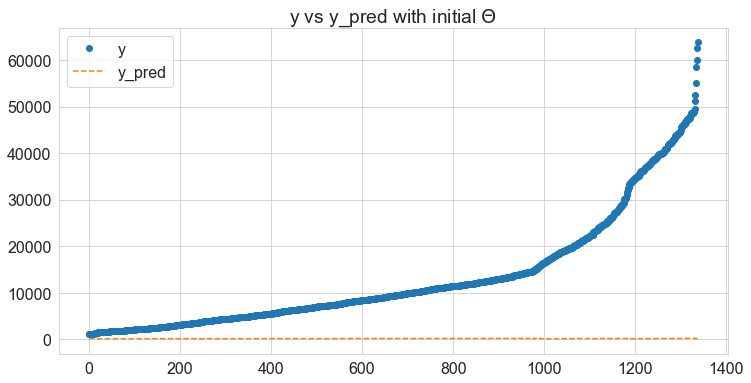

In [76]:
# Initial estimate of parameters
initial_theta = np.zeros((X.shape[1],1))+2

y_pred = X.dot(initial_theta)

sortidx = np.argsort(y[:,0]) # sort the values for better visualization
plt.plot(y[sortidx,0],'o', label = "y")
plt.plot(y_pred[sortidx,0],'--', label = "y_pred")
plt.title("y vs y_pred with initial $ \Theta $");
plt.legend()
plt.show();

In [77]:
theta,theta_history,J_history = gradient_descent(initial_theta, lambda_val=10, learning_rate=0.05)

epoch 	 Cost(J) 	
    0	426138302511.1221	


C:\Users\ELINIM~1\AppData\Local\Temp/ipykernel_23300/3666452722.py:2: RuntimeWarning: overflow encountered in square
  J = np.sum(((X.dot(theta)-y)**2) + lambda_val*np.sum(np.square(theta)), axis=0)[0]
C:\Users\ELINIM~1\AppData\Local\Temp/ipykernel_23300/3666452722.py:2: RuntimeWarning: overflow encountered in add
  J = np.sum(((X.dot(theta)-y)**2) + lambda_val*np.sum(np.square(theta)), axis=0)[0]
C:\Users\ELINIM~1\AppData\Local\Temp/ipykernel_23300/2584087369.py:25: RuntimeWarning: overflow encountered in square
  if np.sum((theta_new - theta)**2) < E:
C:\Users\Eli Nimy\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\ELINIM~1\AppData\Local\Temp/ipykernel_23300/2584087369.py:2: RuntimeWarning: invalid value encountered in multiply
  dJ = 1/n*np.sum((X.dot(theta)-y)*X,axis=0).reshape(-1,1)
C:\Users\ELINIM~1\AppData\Local\Temp/ipykernel_23300/2584087369.py:20: Runt

10000	    nan	
20000	    nan	
30000	    nan	
40000	    nan	
50000	    nan	
60000	    nan	
70000	    nan	
80000	    nan	
90000	    nan	


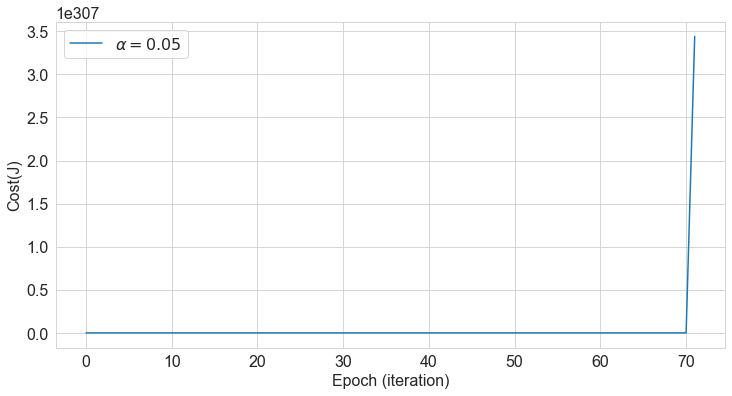

In [78]:
plt.plot(J_history, label = r"$\alpha = 0.05$");
plt.xlabel("Epoch (iteration)")
plt.ylabel("Cost(J)")
plt.legend()
plt.show();

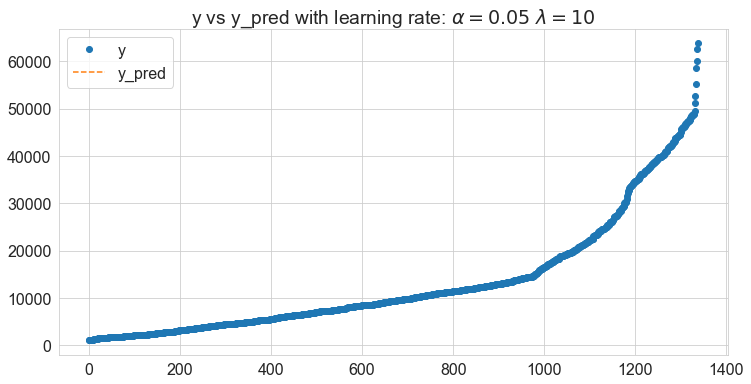

In [79]:
y_pred = X.dot(theta)
sortidx = np.argsort(y[:,0])
plt.plot(y[sortidx,0],'o', label = "y")
plt.plot(y_pred[sortidx,0],'--', label = "y_pred")
plt.title(r"y vs y_pred with learning rate: $ \alpha = 0.05$ $\lambda = 10$")
plt.legend()
plt.show();

In [80]:
theta,theta_history,J_history = gradient_descent(initial_theta, lambda_val=10, learning_rate=0.0005)

epoch 	 Cost(J) 	
    0	426138302511.1221	
10000	2314633100125.3486	
20000	4634666887181.5117	
30000	5954207477281.9424	
40000	6647305008929.7188	
50000	7027897513129.2285	
60000	7258938204431.0898	
70000	7416168883216.3906	
80000	7533831481994.7715	
90000	7627604320253.2676	


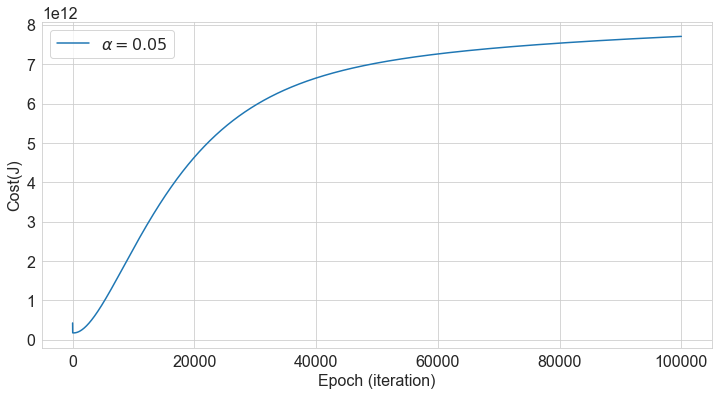

In [81]:
plt.plot(J_history, label = r"$\alpha = 0.05$");
plt.xlabel("Epoch (iteration)")
plt.ylabel("Cost(J)")
plt.legend()
plt.show();

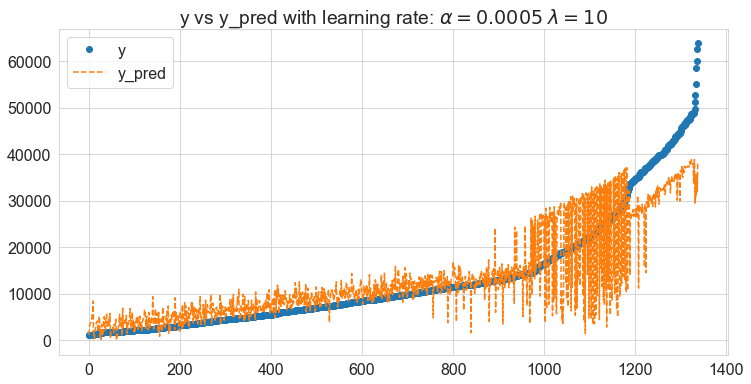

In [82]:
y_pred = X.dot(theta)
sortidx = np.argsort(y[:,0])
plt.plot(y[sortidx,0],'o', label = "y")
plt.plot(y_pred[sortidx,0],'--', label = "y_pred")
plt.title(r"y vs y_pred with learning rate: $ \alpha = 0.0005$ $ \lambda = 10 $")
plt.legend()
plt.show();

In [83]:
theta,theta_history,J_history = gradient_descent(initial_theta, lambda_val=1000, learning_rate=0.0005)

epoch 	 Cost(J) 	
    0	426138302511.1221	
10000	23735493581312.7031	
Convergence achieved.


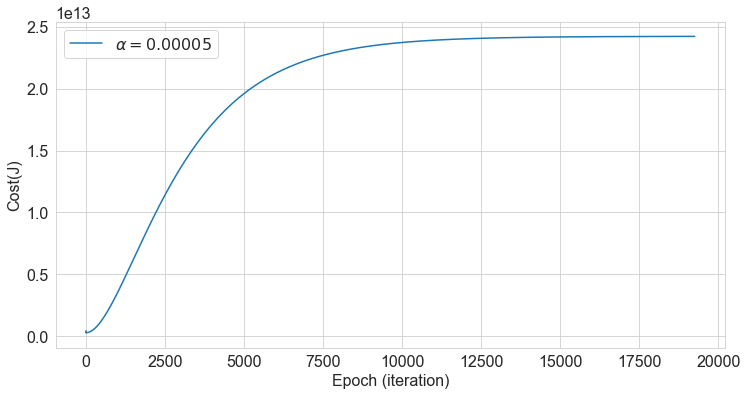

In [84]:
plt.plot(J_history, label = r"$\alpha = 0.00005$");
plt.xlabel("Epoch (iteration)")
plt.ylabel("Cost(J)")
plt.legend()
plt.show();

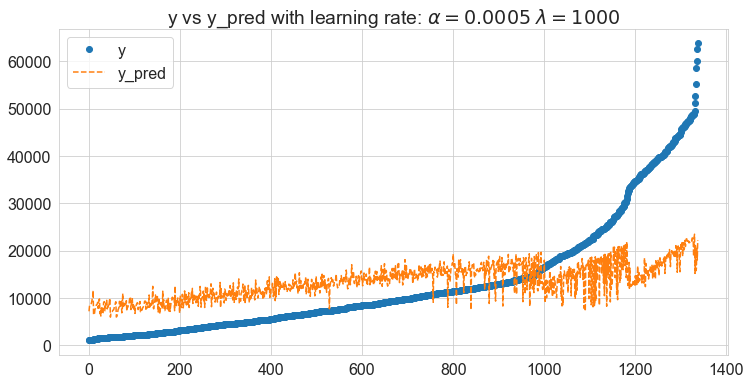

In [85]:
y_pred = X.dot(theta)
sortidx = np.argsort(y[:,0])
plt.plot(y[sortidx,0],'o', label = "y")
plt.plot(y_pred[sortidx,0],'--', label = "y_pred")
plt.title(r"y vs y_pred with learning rate: $ \alpha = 0.0005$ $ \lambda = 1000$")
plt.legend()
plt.show();

In [86]:
theta,theta_history,J_history = gradient_descent(initial_theta, lambda_val=10000, learning_rate=0.0005)

epoch 	 Cost(J) 	
    0	426138302511.1221	
Convergence achieved.


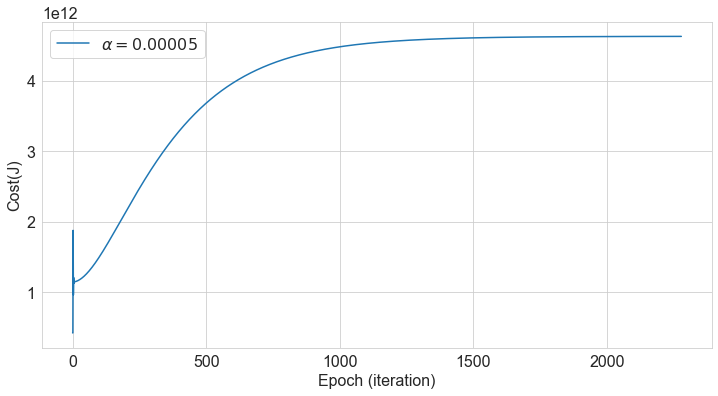

In [87]:
plt.plot(J_history, label = r"$\alpha = 0.00005$");
plt.xlabel("Epoch (iteration)")
plt.ylabel("Cost(J)")
plt.legend()
plt.show();

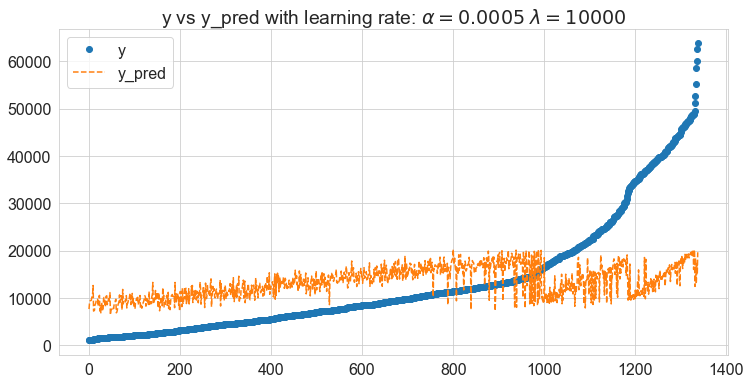

In [88]:
y_pred = X.dot(theta)
sortidx = np.argsort(y[:,0])
plt.plot(y[sortidx,0],'o', label = "y")
plt.plot(y_pred[sortidx,0],'--', label = "y_pred")
plt.title(r"y vs y_pred with learning rate: $ \alpha = 0.0005$ $ \lambda = 10000$")
plt.legend()
plt.show();

In [89]:
theta,theta_history,J_history = gradient_descent(initial_theta, lambda_val=1000000, learning_rate=0.0005)

epoch 	 Cost(J) 	
    0	426138302511.1221	
Convergence achieved.


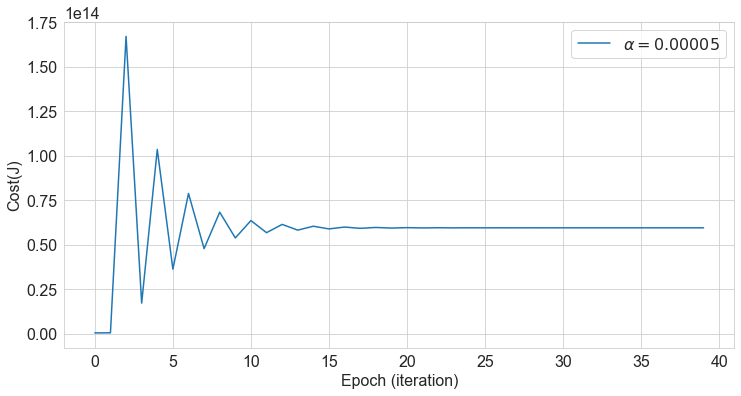

In [90]:
plt.plot(J_history, label = r"$\alpha = 0.00005$");
plt.xlabel("Epoch (iteration)")
plt.ylabel("Cost(J)")
plt.legend()
plt.show();

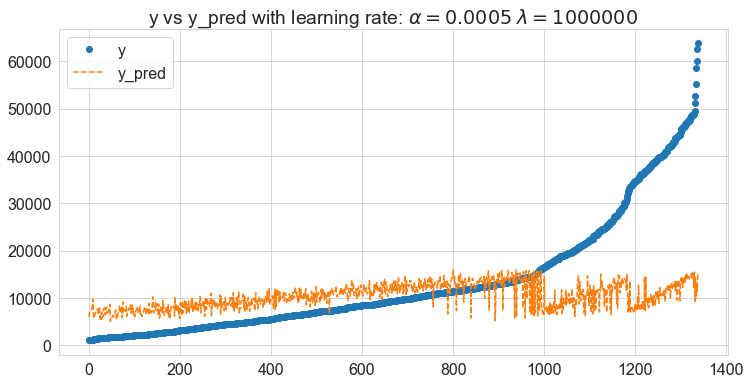

In [91]:
y_pred = X.dot(theta)
sortidx = np.argsort(y[:,0])
plt.plot(y[sortidx,0],'o', label = "y")
plt.plot(y_pred[sortidx,0],'--', label = "y_pred")
plt.title(r"y vs y_pred with learning rate: $ \alpha = 0.0005$ $ \lambda = 1000000$")
plt.legend()
plt.show();